In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [49]:
df1 = pd.read_csv('D:\\Chrome\\CARS_1.csv')
df2 = pd.read_csv('D:\\Chrome\\EV_India.csv')
df3 = df2.fillna(0)

In [50]:
df2.head()

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
1,2,Andra Pradesh,NaN,NaN,NaN
2,3,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,4,Assam,64766,"46,77,053","47,41,819"
4,5,Bihar,83335,"1,04,07,078","1,04,90,413"


In [51]:
totalevs = df3['Total Electric Vehicle'].str.replace(',','')
totalnonevs = df3['Total Non-Electric Vehicle'].str.replace(',','')
totalevs = totalevs.fillna(0)
totalnonevs = totalnonevs.fillna(0)
totalevs = totalevs.astype(int)
totalnonevs = totalnonevs.astype(int)
state = df3['State Name']

In [52]:
statewisedata = pd.concat([state , totalevs , totalnonevs],axis = 1)
statewisedata.head()

,State Name,Total Electric Vehicle,Total Non-Electric Vehicle
0,Andaman & Nicobar Island,162,146945
1,Andra Pradesh,0,0
2,Arunachal Pradesh,20,252965
3,Assam,64766,4677053
4,Bihar,83335,10407078


In [53]:
sorted_state_by_ev = statewisedata.sort_values(by = "Total Electric Vehicle" , ascending= False)
sorted_state_by_nonev = statewisedata.sort_values(by = "Total Non-Electric Vehicle" , ascending= False)
top_10_ev_state = sorted_state_by_ev[:10]
top_10_nonev_state = sorted_state_by_nonev[:10]


In [54]:
tev1 = df2['Total Electric Vehicle']
tev = tev1.fillna(0)
tev = tev.str.replace(',', '')
tev = tev.fillna(0)
tev = tev.astype(int)

In [55]:
sname = df2['State Name']
evsname = pd.merge(sname,tev,left_index=True,right_index=True)

### number of electric vehicle by state

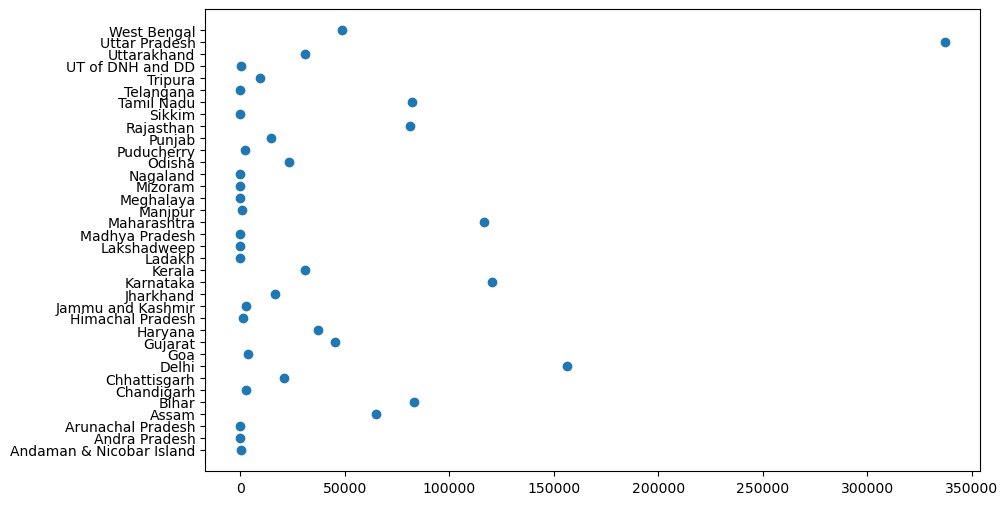

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(evsname['Total Electric Vehicle'],evsname['State Name'])

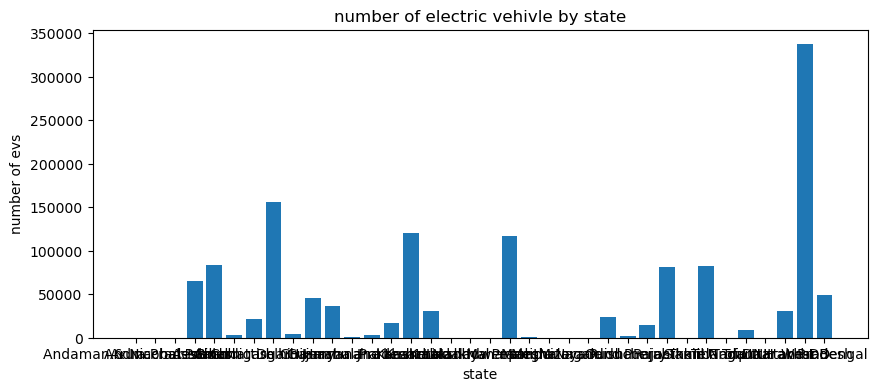

In [57]:
plt.figure(figsize=(10, 4))
plt.bar(evsname['State Name'],evsname['Total Electric Vehicle'])
plt.title('number of electric vehivle by state')
plt.xlabel('state')
plt.ylabel('number of evs')
plt.show()

### top 10 states having highest numbers of evs

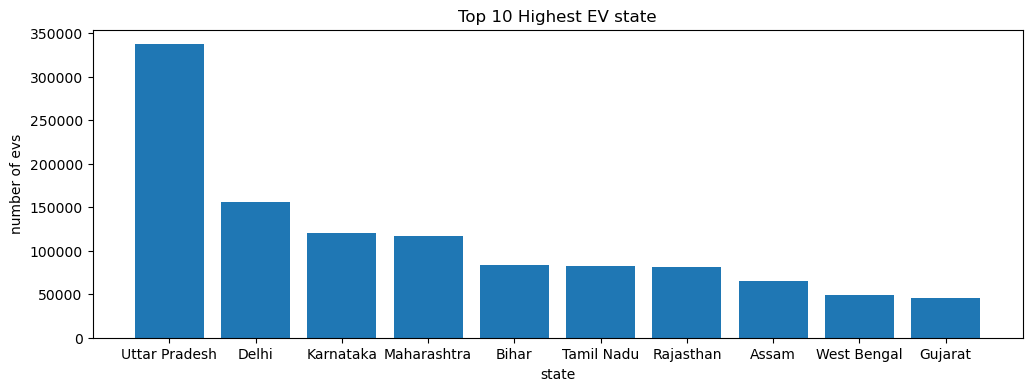

In [58]:
plt.figure(figsize=(12, 4))
plt.bar(top_10_ev_state['State Name'],top_10_ev_state['Total Electric Vehicle'])
plt.title('Top 10 Highest EV state')
plt.xlabel('state')
plt.ylabel('number of evs')
plt.show()

### top 10 states having highest numbers of non-evs


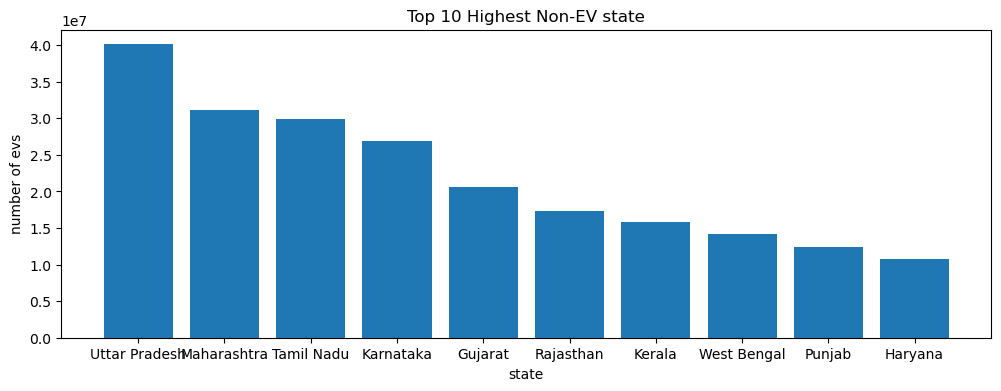

In [59]:
plt.figure(figsize=(12, 4))
plt.bar(top_10_nonev_state['State Name'],top_10_nonev_state['Total Non-Electric Vehicle'])
plt.title('Top 10 Highest Non-EV state')
plt.xlabel('state')
plt.ylabel('number of evs')
plt.show()

In [60]:
df1.head()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500


In [61]:
df1['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'Electric'], dtype=object)

In [62]:
petrol = df1[df1['fuel_type'] == 'Petrol']
diesel = df1[df1['fuel_type'] == 'Diesel']
ev = df1[df1['fuel_type'] == 'Electric']
ev.head()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
36,Hyundai Kona Electric,40,Electric,0,0,5.0,Electric,0.0,SUV,4.5,2384000,2403000,395.0,0,134.10,0
75,Kia EV6,15,Electric,0,0,5.0,Electric,0.0,SUV,4.5,5995000,6495000,605.0,0,320.55,0
95,MG ZS EV,14,Electric,0,0,5.0,Electric,0.0,SUV,4.5,2200000,2588000,280.0,0,173.83,0
98,BMW i4,8,Electric,0,0,5.0,Electric,0.0,Sedan,4.5,6990000,6990000,430.0,0,335.25,0
113,BYD E6,6,Electric,0,0,5.0,Electric,0.0,MUV,4.5,2915000,2915000,180.0,0,93.87,0


###  Overall Average Torque Category vise


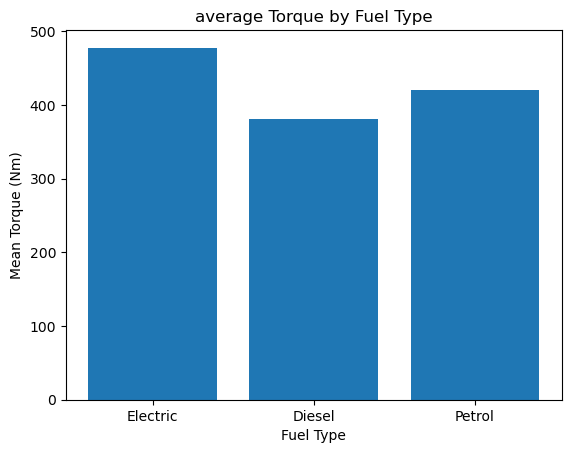

In [63]:
emt = ev['max_torque_nm'].mean()
dmt = diesel['max_torque_nm'].mean()
pmt = petrol['max_torque_nm'].mean()

fuel_types = ['Electric', 'Diesel', 'Petrol']
mean_torques = [emt, dmt, pmt]

plt.bar(fuel_types, mean_torques)

plt.title('average Torque by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mean Torque (Nm)')

plt.show()

In [64]:
sorted_ev_torque_nm = ev.sort_values(by = 'max_torque_nm',ascending=False)
sorted_deisel_torque_nm = diesel.sort_values(by = 'max_torque_nm',ascending=False)
sorted_petrol_torque_nm = petrol.sort_values(by = 'max_torque_nm',ascending=False)
top_10_ev_avg_torque_nm = sorted_ev_torque_nm[:10]['max_torque_nm'].mean()
top_10_diesel_avg_torque_nm = sorted_deisel_torque_nm[:10]['max_torque_nm'].mean()
top_10_petrol_avg_torque_nm = sorted_petrol_torque_nm[:10]['max_torque_nm'].mean()

### Average Torque of top 10 vehicle Category vise

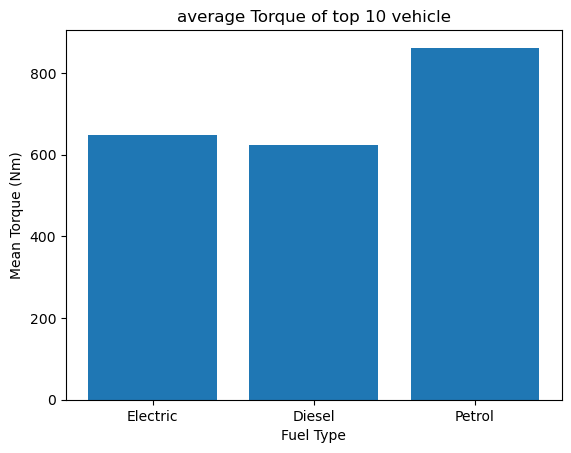

In [65]:
fuel_types = ['Electric', 'Diesel', 'Petrol']
mean_torques = [top_10_ev_avg_torque_nm,top_10_diesel_avg_torque_nm,top_10_petrol_avg_torque_nm]

plt.bar(fuel_types, mean_torques)

plt.title('average Torque of top 10 vehicle')
plt.xlabel('Fuel Type')
plt.ylabel('Mean Torque (Nm)')

plt.show()

### Overall Price of Vehicle Category vise

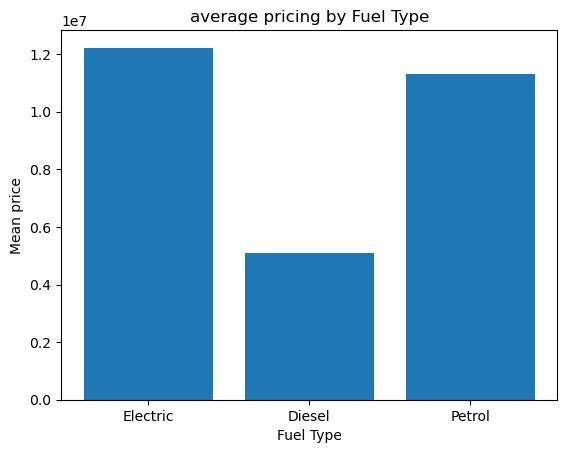

In [66]:
evprice = ev['starting_price'].mean()
dpr = diesel['starting_price'].mean()
ppr = petrol['starting_price'].mean()

fuel_types = ['Electric', 'Diesel', 'Petrol']
mean_price = [evprice , dpr , ppr]

plt.bar(fuel_types, mean_price)

plt.title('average pricing by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mean price')

plt.show()

In [67]:
sorted_ev_price = ev.sort_values(by = 'ending_price',ascending=False)
sorted_deisel_price = diesel.sort_values(by = 'ending_price',ascending=False)
sorted_petrol_price = petrol.sort_values(by = 'ending_price',ascending=False)
top_10_ev_avg_price = sorted_ev_torque_nm[:10]['ending_price'].mean()
top_10_diesel_avg_price= sorted_deisel_torque_nm[:10]['ending_price'].mean()
top_10_petrol_avg_price = sorted_petrol_torque_nm[:10]['ending_price'].mean()

### Top 10 Most Expensive Vehicle

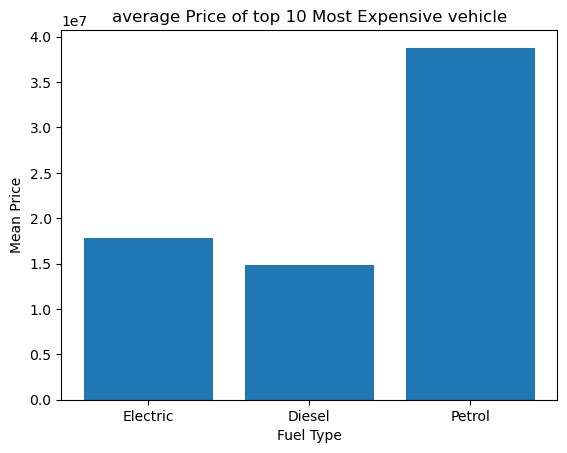

In [68]:
fuel_types = ['Electric', 'Diesel', 'Petrol']
mean_torques = [top_10_ev_avg_price,top_10_diesel_avg_price,top_10_petrol_avg_price]

plt.bar(fuel_types, mean_torques)

plt.title('average Price of top 10 Most Expensive vehicle')
plt.xlabel('Fuel Type')
plt.ylabel('Mean Price')

plt.show()

### Overall Average HorshPower(hp)

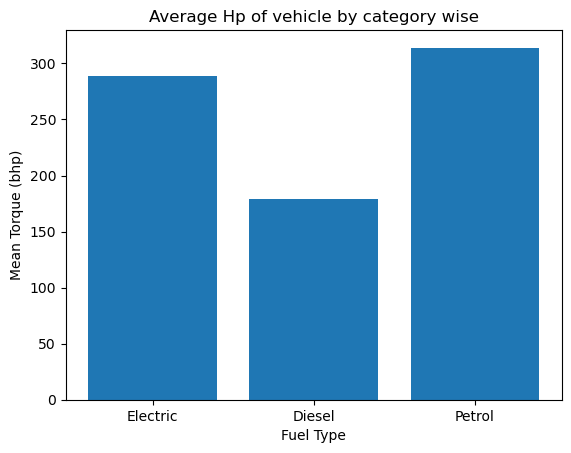

In [69]:
ebhp = ev['max_power_bhp'].mean()
dbhp = diesel['max_power_bhp'].mean()
pbhp = petrol['max_power_bhp'].mean()

fuel_types = ['Electric', 'Diesel', 'Petrol']
mean_torquebhp = [ebhp, dbhp, pbhp]

plt.bar(fuel_types, mean_torquebhp)

plt.title('Average Hp of vehicle by category wise')
plt.xlabel('Fuel Type')
plt.ylabel('Mean Torque (bhp)')

plt.show()

In [70]:
sorted_ev_hp = ev.sort_values(by = 'max_power_bhp',ascending=False)
sorted_deisel_hp = diesel.sort_values(by = 'max_power_bhp',ascending=False)
sorted_petrol_hp = petrol.sort_values(by = 'max_power_bhp',ascending=False)
top_10_ev_avg_hp = sorted_ev_torque_nm[:10]['max_power_bhp'].mean()
top_10_diesel_avg_hp = sorted_deisel_torque_nm[:10]['max_power_bhp'].mean()
top_10_petrol_avg_hp = sorted_petrol_torque_nm[:10]['max_power_bhp'].mean()

### Average of top 10 highest Horshpower(hp) Vehicle

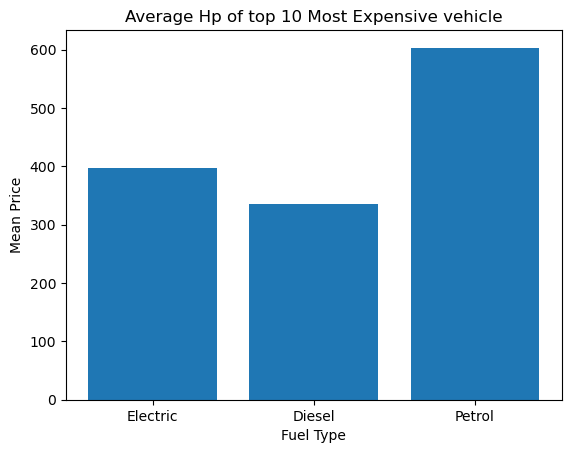

In [71]:
fuel_types = ['Electric', 'Diesel', 'Petrol']
mean_hp = [top_10_ev_avg_hp,top_10_diesel_avg_hp,top_10_petrol_avg_hp]

plt.bar(fuel_types, mean_hp)

plt.title('Average Hp of top 10 Most Expensive vehicle')
plt.xlabel('Fuel Type')
plt.ylabel('Mean Price')

plt.show()

In [72]:
ev_price = ev['starting_price']
ev_torque = ev['max_torque_nm']
ev_hp = ev['max_power_bhp']
ev_torque = pd.merge(ev_price,ev_torque,left_index=True , right_index= True)
ev_detail = pd.merge(ev_torque,ev_hp,left_index=True , right_index= True)
ev_hp = pd.merge(ev_price,ev_hp,left_index=True,right_index=True)
ev_torque.head()

,starting_price,max_torque_nm
36,2384000,395.0
75,5995000,605.0
95,2200000,280.0
98,6990000,430.0
113,2915000,180.0


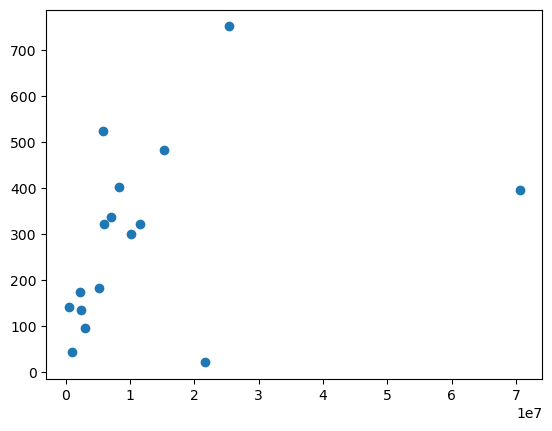

In [73]:
plt.scatter(ev_detail['starting_price'],ev_detail['max_power_bhp'])

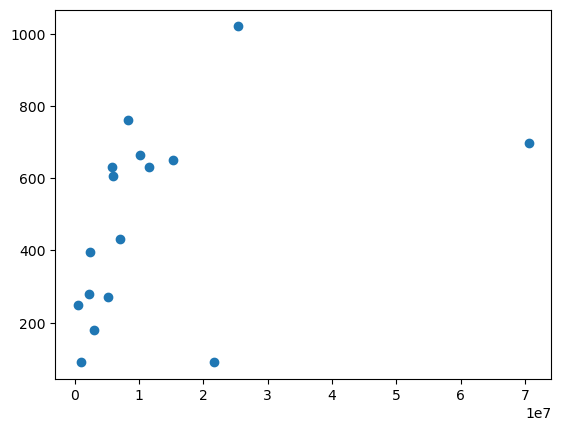

In [74]:
plt.scatter(ev_detail['starting_price'],ev_detail['max_torque_nm'])

In [75]:
warnings.filterwarnings('ignore')
torque_elbow = []
hp_elbow = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(ev_torque)
    torque_elbow.append(km.inertia_)
    
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(ev_hp)
    hp_elbow.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Graph for torque')

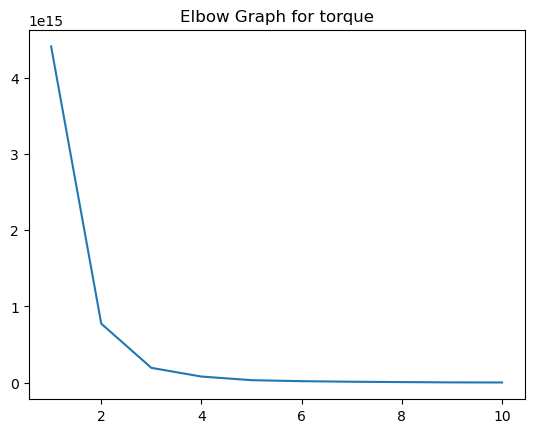

In [93]:
plt.plot(range(1,11),torque_elbow)
plt.title('Elbow Graph for torque')

Text(0.5, 1.0, 'Elbow Graph For Hp')

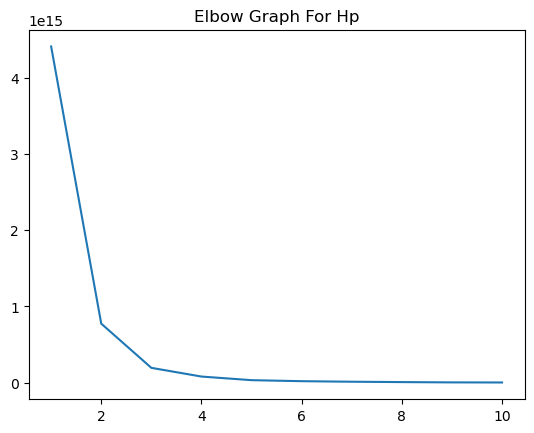

In [94]:
plt.plot(range(1,11),hp_elbow)
plt.title('Elbow Graph For Hp')

In [78]:
ev_torque_ = ev_torque.iloc[:,:].values
ev_hp_ = ev_hp.iloc[:,:].values
km = KMeans(n_clusters=3)
ev_torque_means = km.fit_predict(ev_torque_)
ev_hp_means = km.fit_predict(ev_hp_)

Text(0, 0.5, 'Torque of The Vehicle')

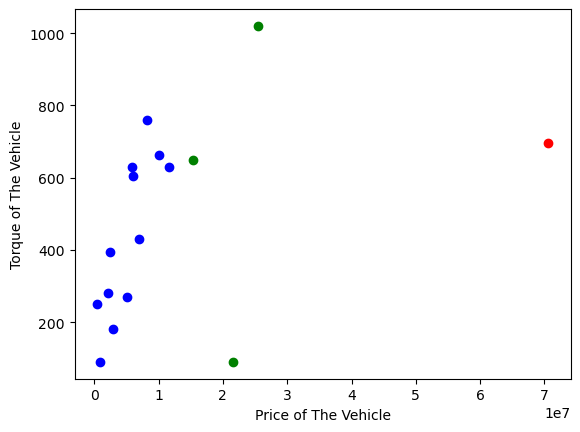

In [79]:
plt.scatter(ev_torque_[ev_torque_means == 0,0],ev_torque_[ev_torque_means == 0,1],color = 'blue')
plt.scatter(ev_torque_[ev_torque_means == 1,0],ev_torque_[ev_torque_means == 1,1],color = 'red')
plt.scatter(ev_torque_[ev_torque_means == 2,0],ev_torque_[ev_torque_means == 2,1],color = 'green')
plt.xlabel('Price of The Vehicle')
plt.ylabel('Torque of The Vehicle')

In [80]:
del ev_torque_means ,ev_hp_means , ev_torque_ , ev_hp_

In [81]:
import warnings
warnings.filterwarnings('ignore')
scaler = MinMaxScaler()
scaler.fit(ev_detail[['starting_price']])
ev_detail['starting_price'] = scaler.transform(ev_detail['starting_price'].values.reshape(-1, 1))

In [82]:
warnings.filterwarnings('ignore')
scaler.fit(ev_detail[['max_torque_nm']])
ev_detail['max_torque_nm'] = scaler.transform(ev_detail['max_torque_nm'].values.reshape(-1, 1))

In [83]:
warnings.filterwarnings('ignore')
scaler.fit(ev_detail[['max_power_bhp']])
ev_detail['max_power_bhp'] = scaler.transform(ev_detail['max_power_bhp'].values.reshape(-1, 1))
ev_detail.head()

,starting_price,max_torque_nm,max_power_bhp
36,0.027389,0.327957,0.155967
75,0.078874,0.553763,0.411077
95,0.024766,0.204301,0.210328
98,0.093061,0.365591,0.431191
113,0.034960,0.096774,0.100922


In [84]:
torque_k = km.fit_predict(ev_detail[['starting_price','max_torque_nm']])
hp_k = km.fit_predict(ev_detail[['starting_price','max_power_bhp']])
hp_k

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1])

In [85]:
ev_price = ev_detail['starting_price']
ev_torque = ev_detail['max_torque_nm']
ev_hp = ev_detail['max_power_bhp']
ev_torque = pd.merge(ev_price,ev_torque,left_index=True , right_index= True)
ev_detail = pd.merge(ev_torque,ev_hp,left_index=True , right_index= True)
ev_hp = pd.merge(ev_price,ev_hp,left_index=True,right_index=True)
ev_torque.head()

,starting_price,max_torque_nm
36,0.027389,0.327957
75,0.078874,0.553763
95,0.024766,0.204301
98,0.093061,0.365591
113,0.034960,0.096774


In [86]:
ev_torque_ = ev_torque.iloc[:,:].values
ev_hp_ = ev_hp.iloc[:,:].values
km = KMeans(n_clusters=3)
ev_torque_means = km.fit_predict(ev_torque_)
ev_hp_means = km.fit_predict(ev_hp_)

Text(0, 0.5, 'Torque of The Vehicle')

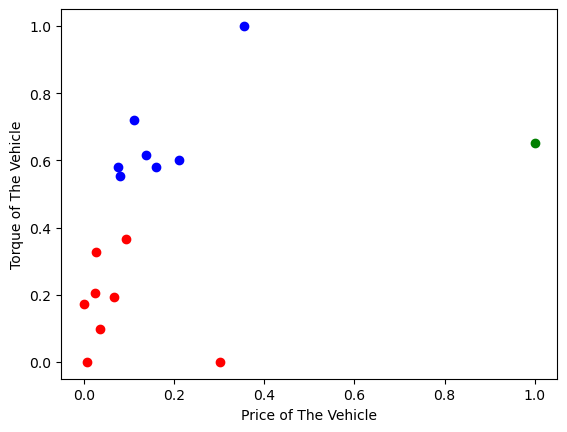

In [89]:
plt.scatter(ev_torque_[ev_torque_means == 0,0],ev_torque_[ev_torque_means == 0,1],color = 'blue')
plt.scatter(ev_torque_[ev_torque_means == 1,0],ev_torque_[ev_torque_means == 1,1],color = 'red')
plt.scatter(ev_torque_[ev_torque_means == 2,0],ev_torque_[ev_torque_means == 2,1],color = 'green')
plt.xlabel('Price of The Vehicle')
plt.ylabel('Torque of The Vehicle')

Text(0, 0.5, 'Bhp of The Vehicle')

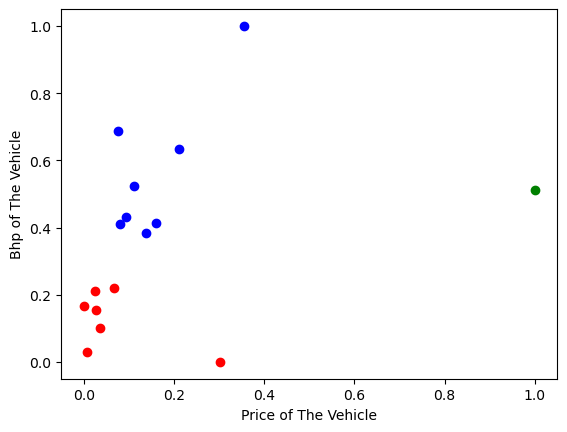

In [91]:
plt.scatter(ev_hp_[ev_hp_means == 0,0],ev_hp_[ev_hp_means == 0,1],color = 'blue')
plt.scatter(ev_hp_[ev_hp_means == 1,0],ev_hp_[ev_hp_means == 1,1],color = 'red')
plt.scatter(ev_hp_[ev_hp_means == 2,0],ev_hp_[ev_hp_means == 2,1],color = 'green')
plt.xlabel('Price of The Vehicle')
plt.ylabel('Bhp of The Vehicle')